In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('premier-league-matches.csv')

In [3]:
dados.shape

(12026, 8)

In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])

In [5]:
dados.dtypes

Season_End_Year             int64
Wk                          int64
Date               datetime64[ns]
Home                       object
HomeGoals                   int64
AwayGoals                   int64
Away                       object
FTR                        object
dtype: object

In [6]:
dados.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [7]:
vitorias_time_casa = pd.DataFrame(dados[dados['FTR'] == 'H']['Home'].value_counts()).head(20)
vitorias_time_casa.head()

,Home
Manchester Utd,417
Arsenal,382
Liverpool,376
Chelsea,360
Tottenham,323


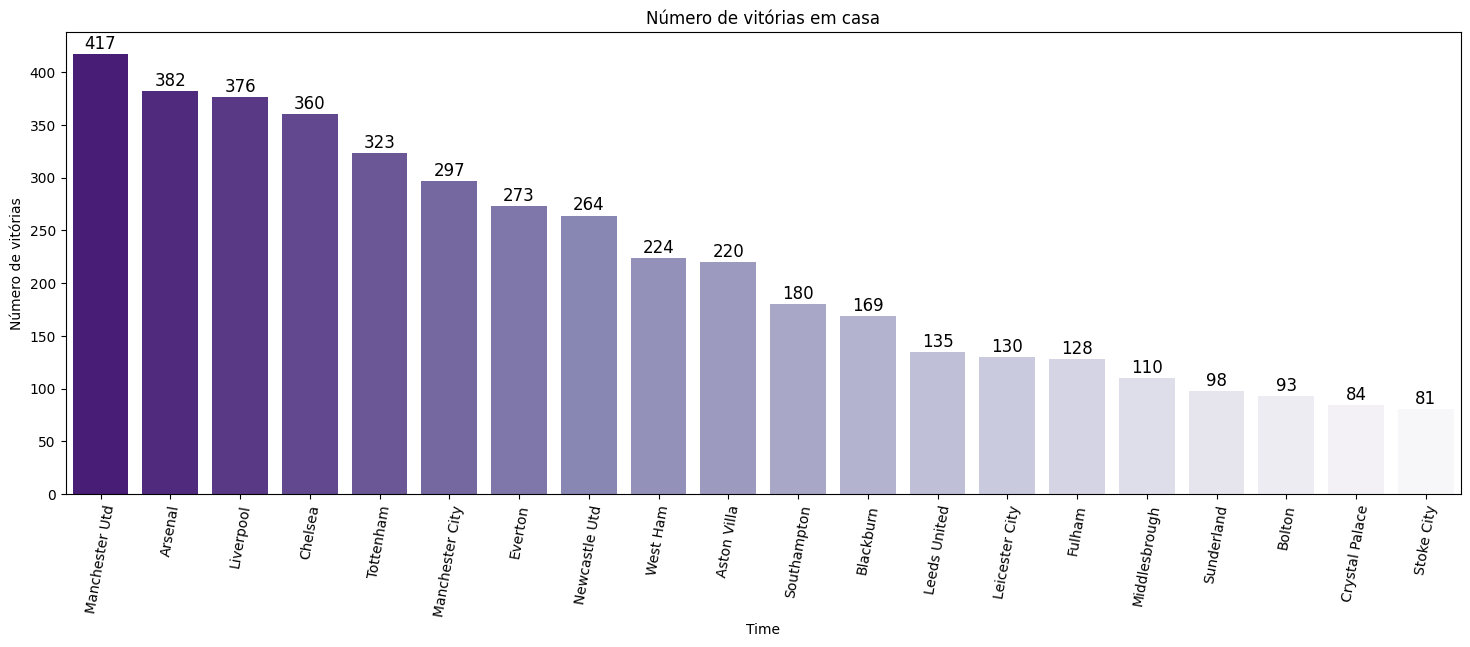

In [8]:
plt.figure(figsize=(18, 6))
sns.barplot(data=vitorias_time_casa, x=vitorias_time_casa.index, y='Home', palette='Purples_r').set(title = 'Número de vitórias em casa')
plt.xticks(rotation = 80)
plt.xlabel('Time')
plt.ylabel('Número de vitórias')
for index, data in enumerate(vitorias_time_casa['Home']):
    plt.text(x=index, y=data + 5, s=f"{data}", ha='center', fontsize=12)
plt.show()

In [9]:
vitorias_time_visitante = pd.DataFrame(dados[dados['FTR'] == 'A']['Away'].value_counts()).head(20)

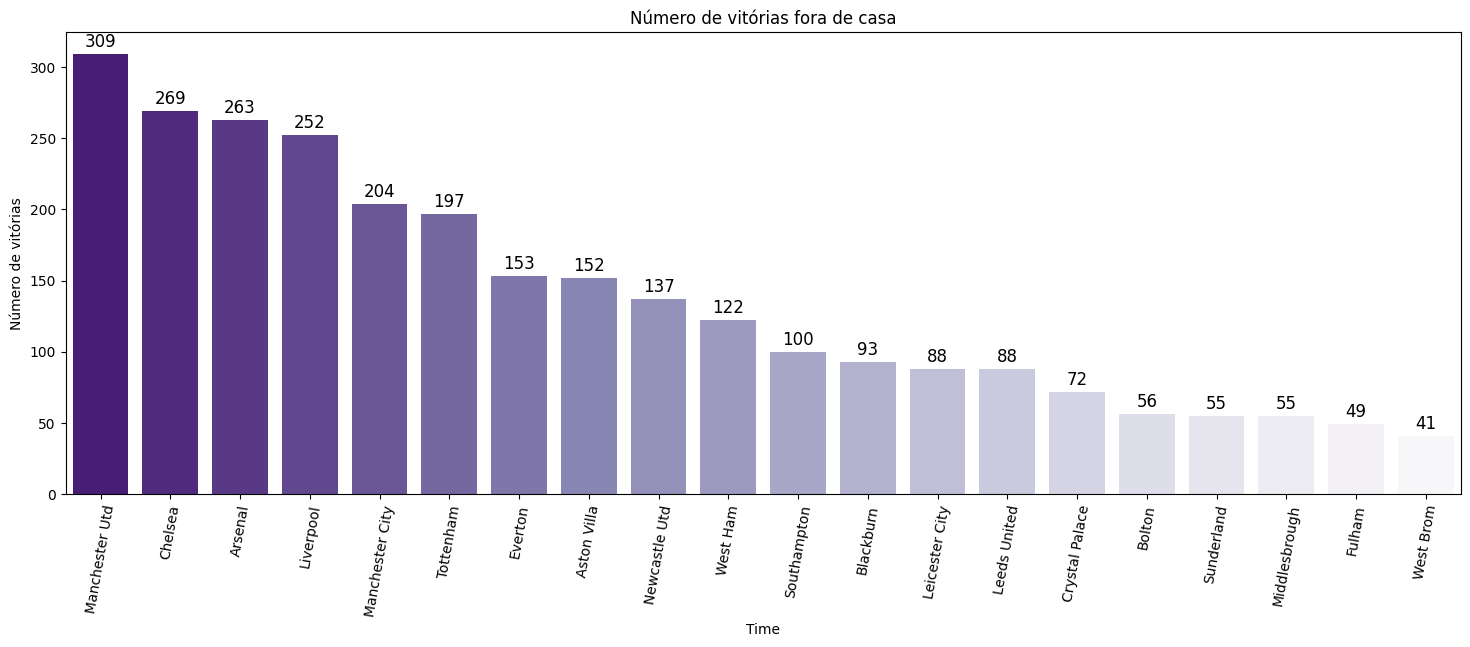

In [10]:
plt.figure(figsize=(18, 6))
sns.barplot(data=vitorias_time_visitante, x=vitorias_time_visitante.index, y='Away', palette='Purples_r').set(title = 'Número de vitórias fora de casa')
plt.xticks(rotation = 80)
plt.xlabel('Time')
plt.ylabel('Número de vitórias')
for index, data in enumerate(vitorias_time_visitante['Away']):
    plt.text(x=index, y=data + 5, s=f"{data}", ha='center', fontsize=12)
plt.show()

In [11]:
dados['Home'].unique().shape

(50,)

In [12]:
dados['Away'].unique().shape

(50,)

In [13]:
round(dados[dados['FTR'] == 'H'].shape[0] / dados.shape[0] * 100, 2)

45.89

In [14]:
round(dados[dados['FTR'] == 'A'].shape[0] / dados.shape[0] * 100, 2)

28.36

In [15]:
round(dados[dados['FTR'] == 'D'].shape[0] / dados.shape[0] * 100, 2)

25.75

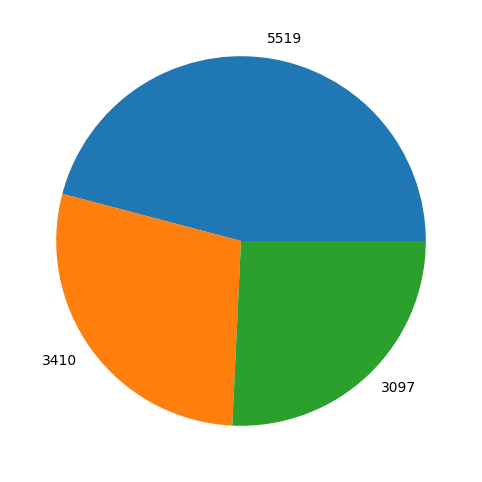

In [16]:
plt.figure(figsize=(12, 6))
plt.pie([45.89, 28.36, 25.75], labels=dados['FTR'].value_counts())
plt.show()

In [17]:
dados['Diferenca_de_gols'] = abs(dados['HomeGoals'] - dados['AwayGoals'])
dados.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Diferenca_de_gols
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,1
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,1
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,1
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,0
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,2


In [18]:
dados['Diferenca_de_gols'].value_counts()

1    4533
0    3097
2    2571
3    1127
4     458
5     170
6      48
7      12
8       6
9       4
Name: Diferenca_de_gols, dtype: int64

In [19]:
dados['Quantidade_gols'] = dados['HomeGoals'] + dados['AwayGoals']

In [20]:
dados.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Diferenca_de_gols,Quantidade_gols
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,1,3
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,1,3
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,1,3
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,0,6
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,2,6


In [21]:
gols_por_temporada = pd.DataFrame(dados.groupby('Season_End_Year')['Quantidade_gols'].sum()).sort_values(by='Quantidade_gols', ascending=False)
gols_por_temporada.head()

,Quantidade_gols
Season_End_Year,
1993,1222
1994,1195
1995,1195
2023,1084
2019,1072


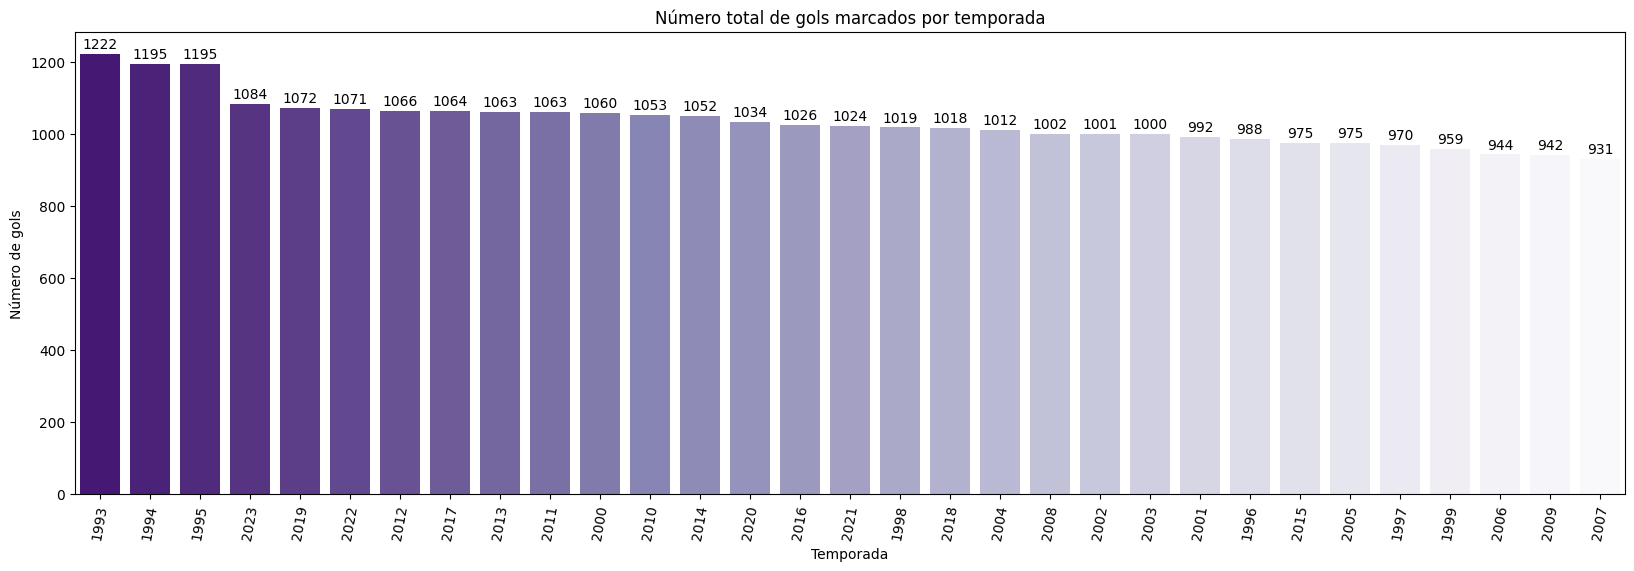

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(data=gols_por_temporada, x=gols_por_temporada.index, y='Quantidade_gols', palette='Purples_r', order=gols_por_temporada.index).set(title = 'Número total de gols marcados por temporada')
plt.xticks(rotation = 80)
plt.xlabel('Temporada')
plt.ylabel('Número de gols')
for index, data in enumerate(gols_por_temporada['Quantidade_gols']):
    plt.text(x=index, y=data + 15, s=f"{data}", ha='center', fontsize=10)
plt.show()

In [23]:
Times_gols_casa = pd.DataFrame(dados.groupby('Home')['HomeGoals'].sum().sort_values(ascending=False))

In [24]:
Times_gols_fora = pd.DataFrame(dados.groupby('Away')['AwayGoals'].sum().sort_values(ascending=False))

In [25]:
Times_gols = pd.merge(Times_gols_casa, Times_gols_fora, left_index=True, right_index=True)

In [26]:
Times_gols['Total'] = Times_gols['HomeGoals'] + Times_gols['AwayGoals']

In [27]:
Times_gols = Times_gols.sort_values(by='Total', ascending=False)

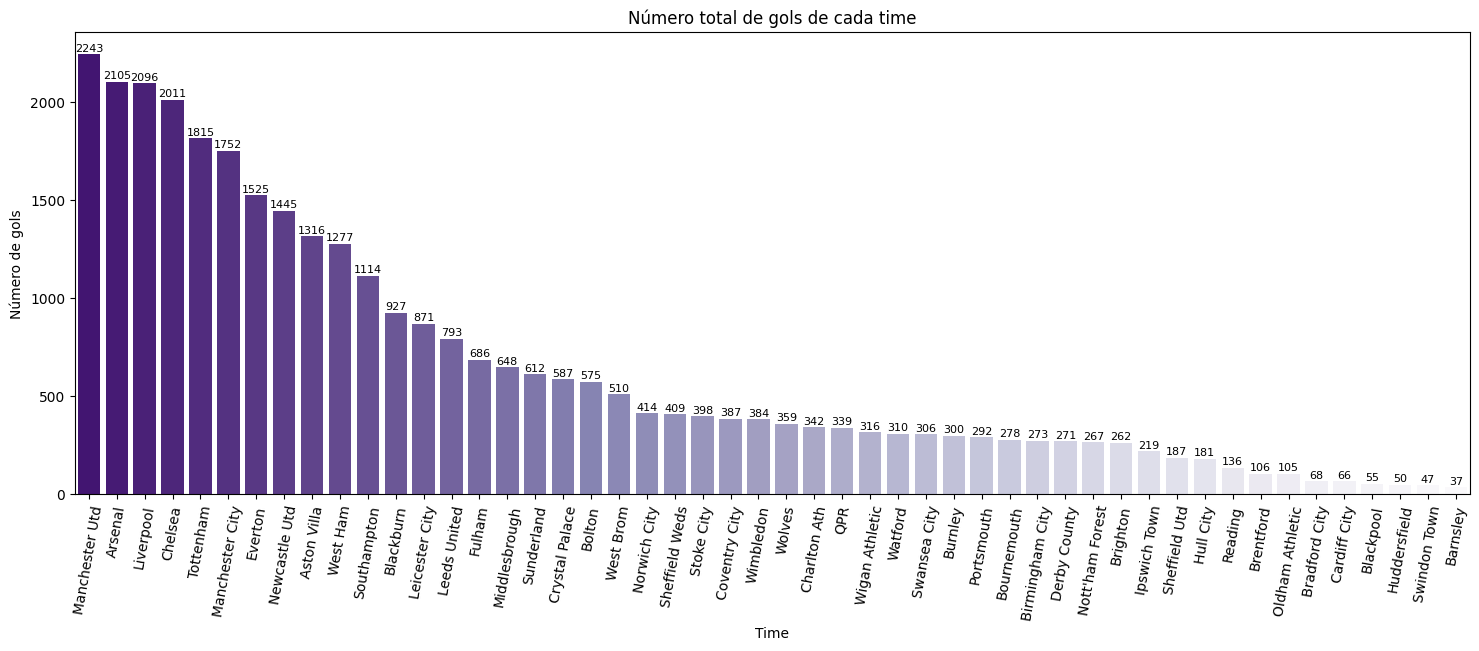

In [28]:
plt.figure(figsize=(18,6))
sns.barplot(data=Times_gols, x=Times_gols.index, y='Total', palette='Purples_r', order=Times_gols.index).set(title = 'Número total de gols de cada time')
plt.xticks(rotation = 80)
plt.xlabel('Time')
plt.ylabel('Número de gols')
for index, data in enumerate(Times_gols['Total']):
    plt.text(x=index, y=data + 15, s=f"{data}", ha='center', fontsize=8)
plt.show()

In [29]:
lista_times = dados.groupby('Season_End_Year')['Home'].unique()

In [30]:
num_participacoes = {}

In [31]:
c = 0
for j in dados['Home'].unique():
    for i in lista_times:
        if j in i:
            c += 1
    #print(j + ': ' + str(c))
    num_participacoes[j] = c
    c = 0

In [32]:
df_num_participacoes = pd.DataFrame(num_participacoes, index=[0])
df_num_participacoes = df_num_participacoes.T
df_num_participacoes.head()

,0
Coventry City,9
Leeds United,15
Sheffield Utd,5
Crystal Palace,14
Arsenal,31


In [33]:
df_num_participacoes = df_num_participacoes.rename(columns={0: 'Participações'})

In [34]:
df_num_participacoes = df_num_participacoes.sort_values(ascending=False, by='Participações')

In [35]:
df_num_participacoes.head()

,Participações
Manchester Utd,31
Arsenal,31
Liverpool,31
Everton,31
Chelsea,31


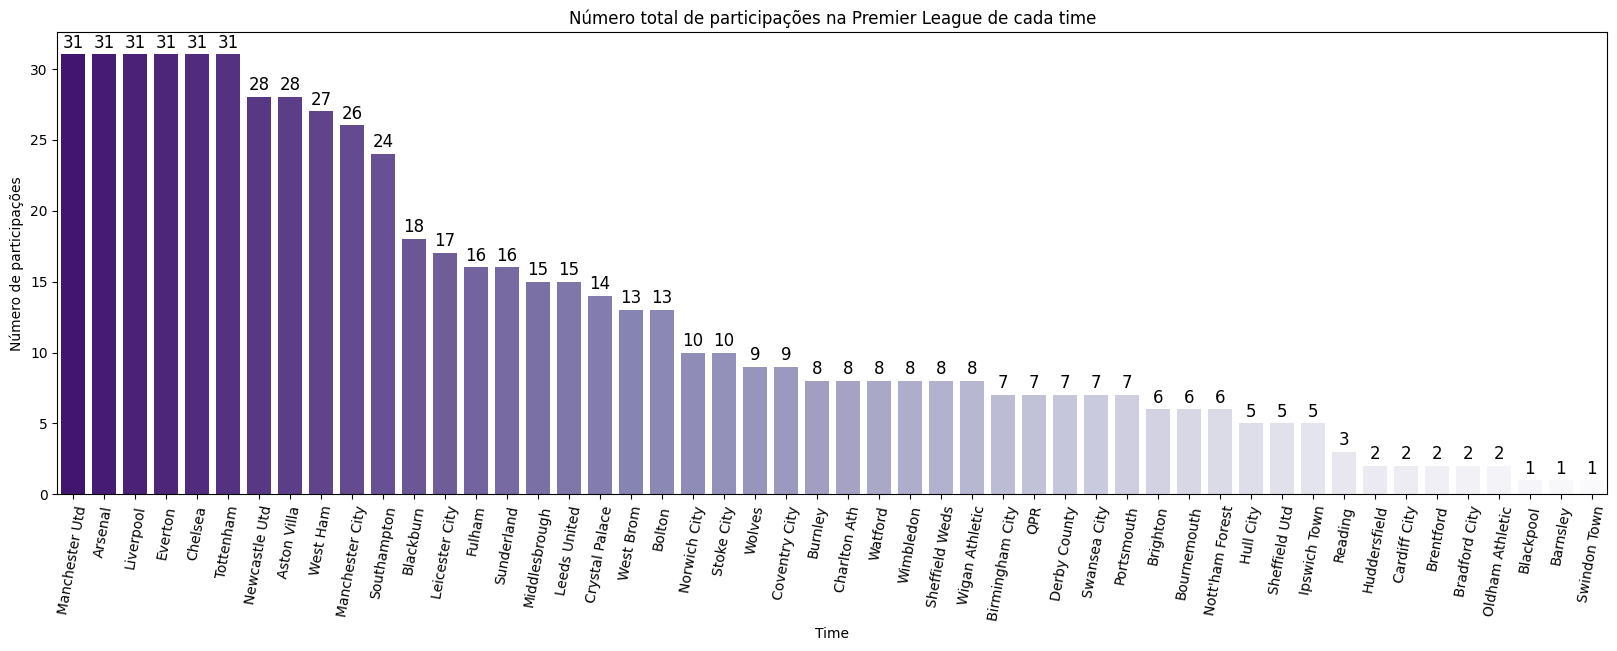

In [36]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_num_participacoes, x=df_num_participacoes.index, y='Participações',
            palette='Purples_r',
            order=df_num_participacoes.index).set(title = 'Número total de participações na Premier League de cada time')
plt.xticks(rotation = 80)
plt.xlabel('Time')
plt.ylabel('Número de participações')
for index, data in enumerate(df_num_participacoes['Participações']):
    plt.text(x=index, y=data + 0.5, s=f"{data}", ha='center', fontsize=12)
plt.show()

In [37]:
dados['HomePoints'] = np.where(dados['FTR'] == 'H', 3, np.where(dados['FTR'] == 'A', 0, 1))

In [38]:
dados['AwayPoints'] = np.where(dados['FTR'] == 'A', 3, np.where(dados['FTR'] == 'H', 0, 1))

In [39]:
dados.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Diferenca_de_gols,Quantidade_gols,HomePoints,AwayPoints
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,1,3,3,0
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,1,3,3,0
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,1,3,3,0
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,0,6,1,1
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,2,6,0,3


In [40]:
Temp93_home = dados[dados['Season_End_Year'] == 1993].groupby('Home')['HomePoints'].sum()
Temp93_away = dados[dados['Season_End_Year'] == 1993].groupby('Away')['AwayPoints'].sum()
Temp93 = pd.merge(Temp93_home, Temp93_away, left_index=True, right_index=True)
Temp93['TotalPoints'] = Temp93['HomePoints'] + Temp93['AwayPoints']
Temp93.sort_values(ascending=False, by='TotalPoints', inplace=True)
Temp93

,HomePoints,AwayPoints,TotalPoints
Home,,,
Manchester Utd,47,37,84
Aston Villa,44,30,74
Norwich City,45,27,72
Blackburn,43,28,71
QPR,38,25,63
Liverpool,43,16,59
Tottenham,38,21,59
Sheffield Weds,35,24,59
Manchester City,29,28,57


In [41]:
Tabela_historica_home = dados.groupby('Home')['HomePoints'].sum()
Tabela_historica_away = dados.groupby('Away')['AwayPoints'].sum()
Tabela_historica = pd.merge(Tabela_historica_home, Tabela_historica_away, left_index=True, right_index=True)
Tabela_historica['TotalPoints'] = Tabela_historica['HomePoints'] + Tabela_historica['AwayPoints']
Tabela_historica.sort_values(ascending=False, by='TotalPoints', inplace=True)
Tabela_historica

,HomePoints,AwayPoints,TotalPoints
Home,,,
Manchester Utd,1364,1077,2441
Arsenal,1280,945,2225
Chelsea,1230,952,2182
Liverpool,1270,906,2176
Tottenham,1102,745,1847
Manchester City,989,729,1718
Everton,976,634,1610
Newcastle Utd,926,555,1481
Aston Villa,813,606,1419


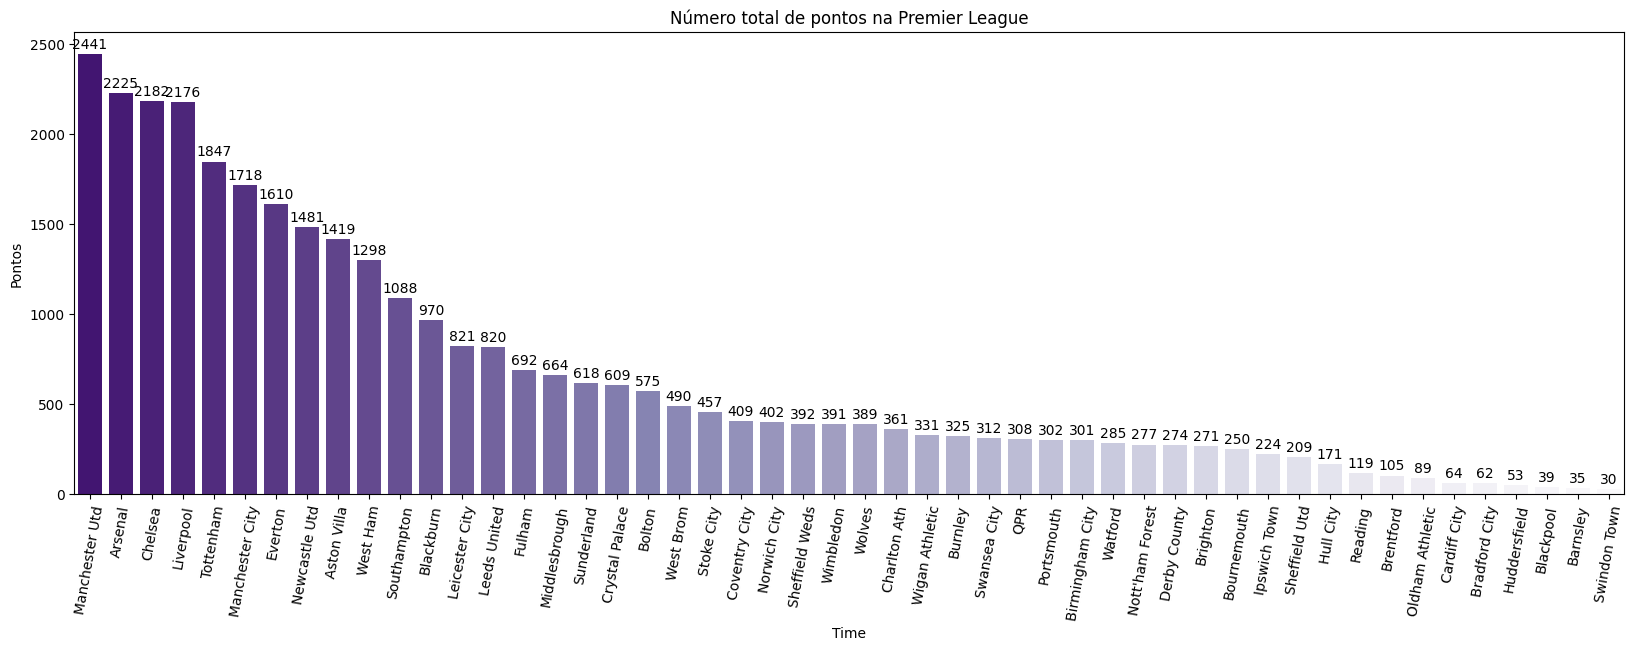

In [42]:
plt.figure(figsize=(20, 6))
sns.barplot(data=Tabela_historica, x=Tabela_historica.index, y='TotalPoints',
            palette='Purples_r',
            order=Tabela_historica.index).set(title = 'Número total de pontos na Premier League')
plt.xticks(rotation = 80)
plt.xlabel('Time')
plt.ylabel('Pontos')
for index, data in enumerate(Tabela_historica['TotalPoints']):
    plt.text(x=index, y=data + 30, s=f"{data}", ha='center', fontsize=10)
plt.show()